In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
from itertools import product
from math import sqrt
from scipy import stats

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Ferro%20(FOE)%20Stock%20Price%20from%201980%20-%202022/FOE.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,2.722222,2.685185,2.685185,1.450476,47925
1,1980-03-18,0.000000,2.703704,2.666667,2.685185,1.450476,77625
2,1980-03-19,0.000000,2.703704,2.666667,2.703704,1.460480,35775
3,1980-03-20,0.000000,2.777778,2.703704,2.722222,1.470483,42525
4,1980-03-21,0.000000,2.777778,2.740741,2.740741,1.480487,37125
...,...,...,...,...,...,...,...
10585,2022-03-09,21.639999,21.780001,21.450001,21.780001,21.780001,820400
10586,2022-03-10,21.570000,21.799999,21.559999,21.790001,21.790001,409500
10587,2022-03-11,21.750000,21.790001,21.660000,21.780001,21.780001,538200
10588,2022-03-14,21.780001,21.780001,21.730000,21.750000,21.750000,726700


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.000000,2.722222,2.685185,2.685185,1.450476,47925
1980-03-18,0.000000,2.703704,2.666667,2.685185,1.450476,77625
1980-03-19,0.000000,2.703704,2.666667,2.703704,1.460480,35775
1980-03-20,0.000000,2.777778,2.703704,2.722222,1.470483,42525
1980-03-21,0.000000,2.777778,2.740741,2.740741,1.480487,37125
...,...,...,...,...,...,...
2022-03-09,21.639999,21.780001,21.450001,21.780001,21.780001,820400
2022-03-10,21.570000,21.799999,21.559999,21.790001,21.790001,409500
2022-03-11,21.750000,21.790001,21.660000,21.780001,21.780001,538200


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10590.000000,10590.000000,10590.000000,10590.000000,10590.000000,1.059000e+04
mean,13.607281,14.631222,14.240872,14.439353,11.952665,3.662785e+05
std,8.521814,7.381201,7.230212,7.309994,6.597625,6.056098e+05
min,0.000000,1.010000,0.810000,0.860000,0.860000,0.000000e+00
25%,7.072500,7.740000,7.420000,7.611111,5.995661,7.695000e+04
50%,14.860000,15.080000,14.666667,14.865000,12.818146,1.966500e+05
75%,20.610001,20.847500,20.333332,20.620001,17.534573,4.675750e+05
max,30.250000,30.937500,30.000000,30.549999,25.350000,2.044590e+07


In [6]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.984536,0.983247,0.983551,0.951436,-0.062758
High,0.984536,1.000000,0.999295,0.999576,0.952573,-0.113658
Low,0.983247,0.999295,1.000000,0.999549,0.950382,-0.125574
Close,0.983551,0.999576,0.999549,1.000000,0.951864,-0.119054
Adj Close,0.951436,0.952573,0.950382,0.951864,1.000000,-0.006426
Volume,-0.062758,-0.113658,-0.125574,-0.119054,-0.006426,1.000000


<AxesSubplot:xlabel='Date'>

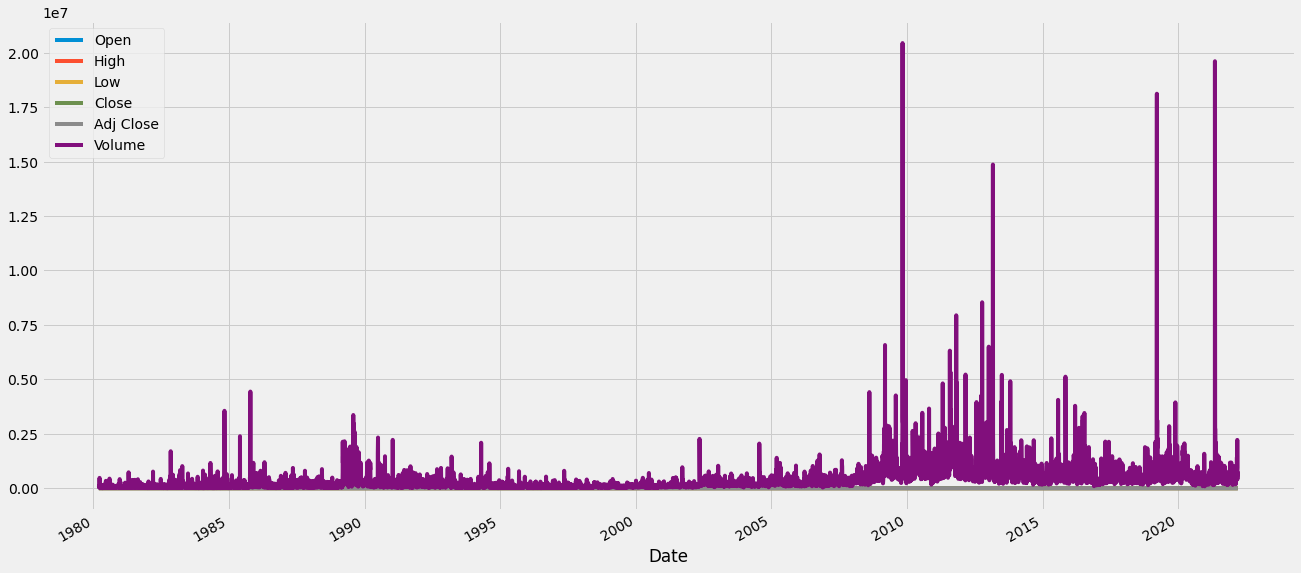

In [7]:
df.plot(figsize = (20,10))

Text(0.5, 1.0, 'Open and Close')

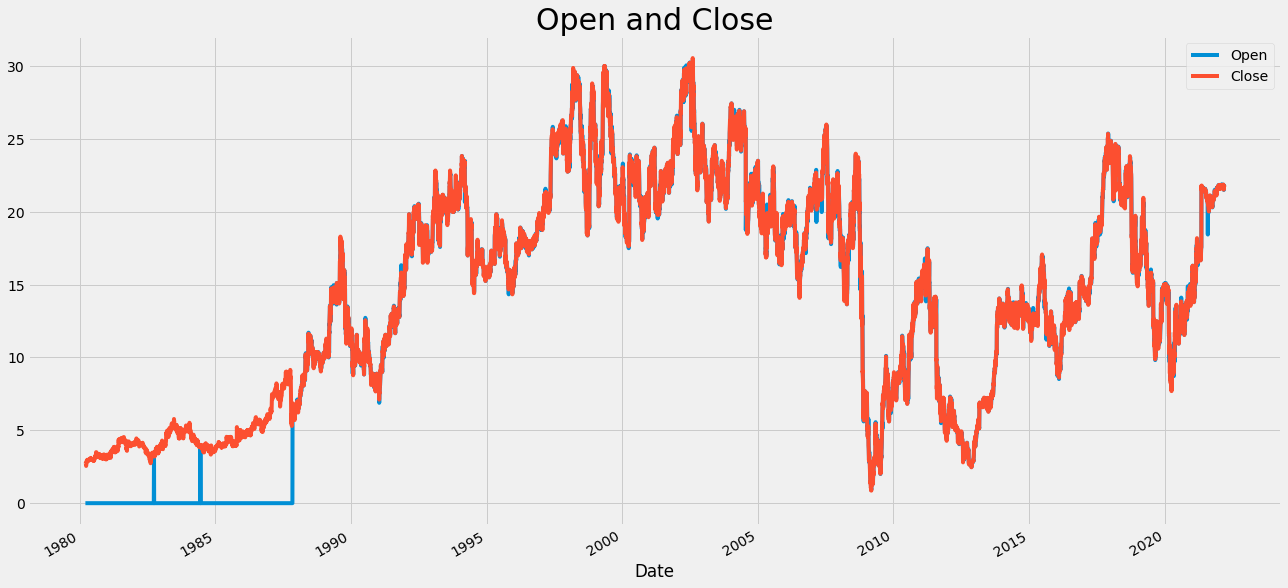

In [8]:
df[['Open','Close']].plot(figsize = (20,10))
plt.title('Open and Close',fontsize = 30)

Text(0.5, 1.0, 'High and Low')

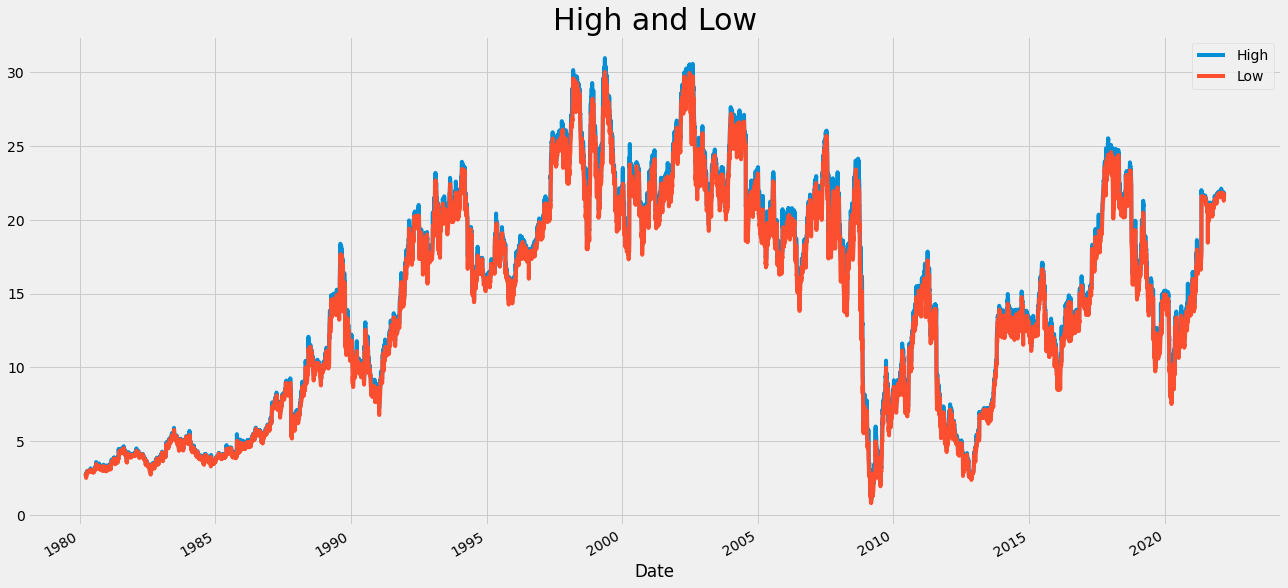

In [9]:
df[['High','Low']].plot(figsize =(20,10))
plt.title('High and Low',fontsize = 30)

Text(0.5, 1.0, 'Volume')

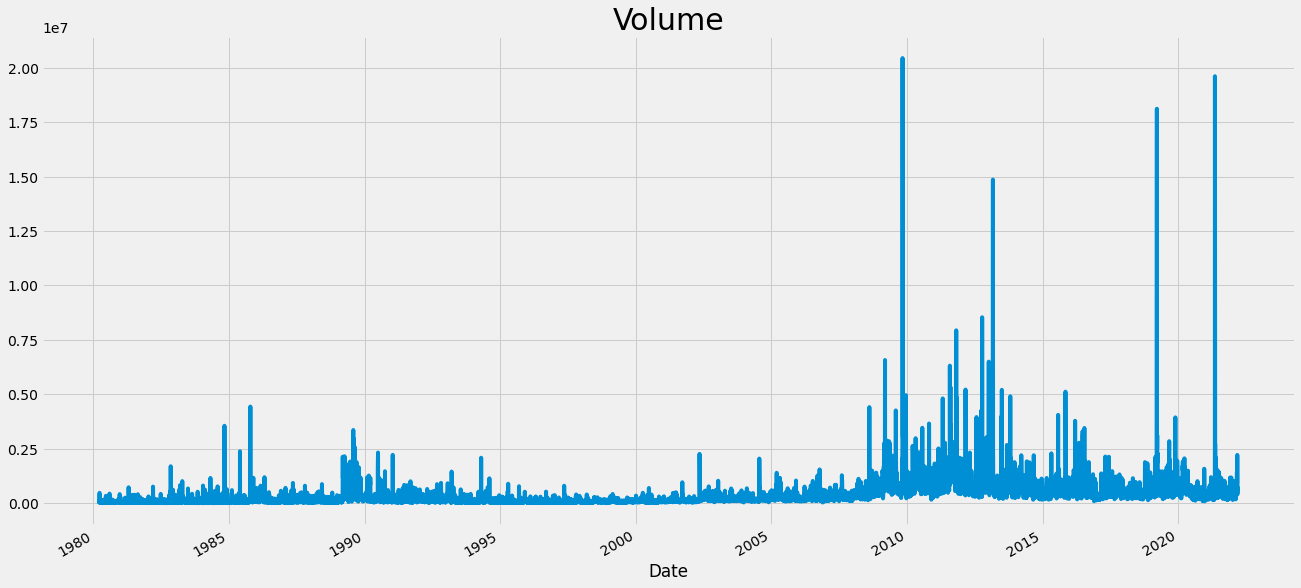

In [10]:
df['Volume'].plot(figsize = (20,10))
plt.title('Volume', fontsize = 30)

In [11]:
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
print(df['PriceDiff'])
df = df.dropna()

Date
1980-03-17    0.000000
1980-03-18    0.018519
1980-03-19    0.018518
1980-03-20    0.018519
1980-03-21   -0.037037
                ...   
2022-03-09    0.010000
2022-03-10   -0.010000
2022-03-11   -0.030001
2022-03-14   -0.049999
2022-03-15         NaN
Name: PriceDiff, Length: 10590, dtype: float64


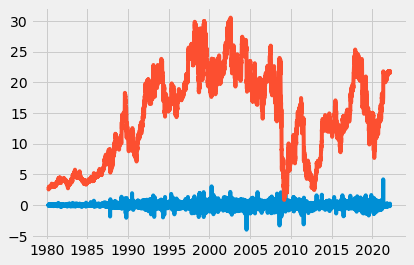

In [12]:
plt.plot(df['PriceDiff'])
plt.plot(df['Close'])
plt.show()

In [13]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df['Shares'] = [1 if df.loc[ei, 'MA10']> df.loc[ei,'MA50']else 0 for ei in df.index]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


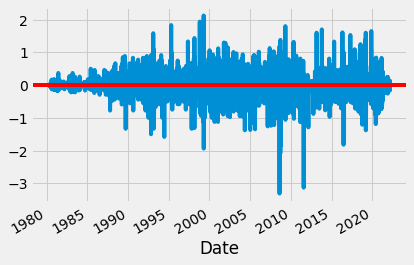

In [15]:
df['Close1'] = df['Close'].shift(-1)
df['Profit'] = [df.loc[ei,'Close1']- df.loc[ei,'Close']if df.loc[ei,'Shares']== 1 else 0 for ei in df.index]
df['Profit'].plot()
plt.axhline(y = 0, color = 'red')

In [16]:
df['wealth'] = df['Profit'].cumsum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,PriceDiff,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,,
2022-03-08,21.500000,21.639999,21.280001,21.530001,21.530001,2217300,0.250000,21.678,21.7468,0,21.780001,0.0,15.519053
2022-03-09,21.639999,21.780001,21.450001,21.780001,21.780001,820400,0.010000,21.686,21.7474,0,21.790001,0.0,15.519053
2022-03-10,21.570000,21.799999,21.559999,21.790001,21.790001,409500,-0.010000,21.705,21.7472,0,21.780001,0.0,15.519053
2022-03-11,21.750000,21.790001,21.660000,21.780001,21.780001,538200,-0.030001,21.709,21.7468,0,21.750000,0.0,15.519053
2022-03-14,21.780001,21.780001,21.730000,21.750000,21.750000,726700,-0.049999,21.711,21.7458,0,NaN,0.0,15.519053


Text(0.5, 1.0, 'Total Money you have made: 15.51905300000002')

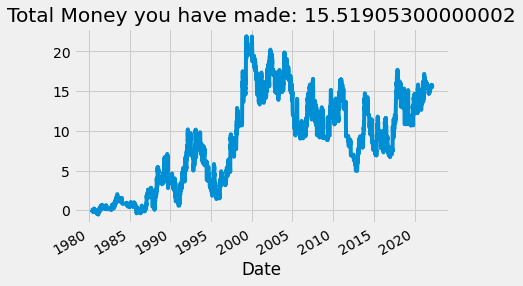

In [18]:
df['wealth'].plot()
plt.title('Total Money you have made: {}'.format(df.loc[df.index[-2],'wealth']))

In [20]:
df['LogReturn'] = np.log(df['Close']).shift(-1) - np.log(df['Close'])
print(df['LogReturn'])

Date
1980-03-17    0.000000
1980-03-18    0.006873
1980-03-19    0.006826
1980-03-20    0.006780
1980-03-21   -0.013606
                ...   
2022-03-08    0.011545
2022-03-09    0.000459
2022-03-10   -0.000459
2022-03-11   -0.001378
2022-03-14         NaN
Name: LogReturn, Length: 10589, dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


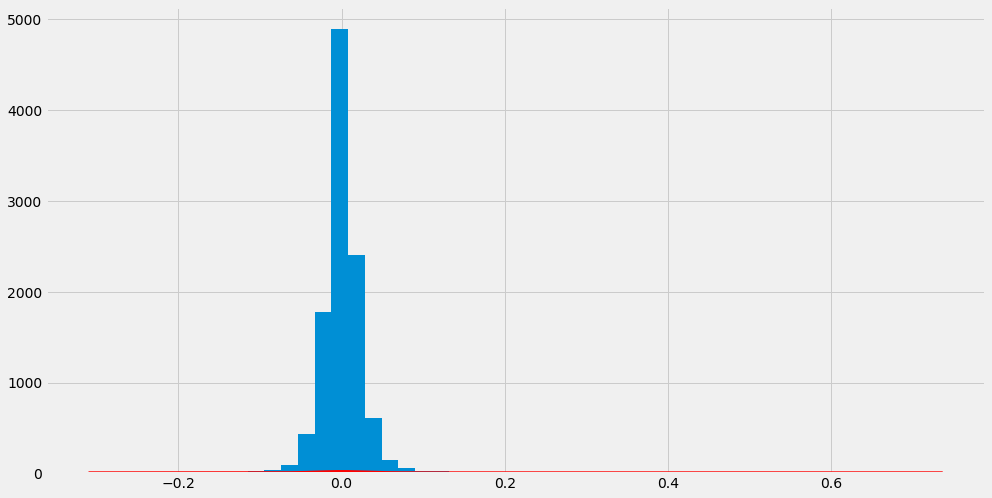

In [21]:
from scipy.stats import norm
mu = df['LogReturn'].mean()
sigma = df['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(df['LogReturn'].min()-0.01,df['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

df['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'],density['pdf'], color ='red')
plt.show()

In [22]:
df['logReturn'] = np.log(df['Close'].shift(-1))-np.log(df['Close'])
sample_size = df['logReturn'].shape[0]
sample_mean = df['logReturn'].mean()
sample_std = df['logReturn'].std(ddof=1)/ sample_size**0.5

z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean+z_right*sample_std

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
print('90% confidence interval is ',(interval_left, interval_right))

90% confidence interval is  (-0.00025505757684086446, 0.0006501962490440968)


In [24]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                    -2.687309
p-value                            0.076260
#Lags Used                        13.000000
Number of Observations Used    10575.000000
Critical Value (1%)               -3.430969
Critical Value (5%)               -2.861813
Critical Value (10%)              -2.566916
dtype: float64
None


In [25]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                  -2.415991
p-value                          0.137274
#Lags Used                       2.000000
Number of Observations Used    502.000000
Critical Value (1%)             -3.443444
Critical Value (5%)             -2.867315
Critical Value (10%)            -2.569846
dtype: float64
None


In [26]:
fer_month = df.resample('M').mean()
df['Returns'] = df['PriceDiff'] / df['Close']
df = df.dropna()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Results of Dickey-Fuller Test:
Test Statistic                -1.627840e+01
p-value                        3.431779e-29
#Lags Used                     1.000000e+00
Number of Observations Used    5.000000e+02
Critical Value (1%)           -3.443496e+00
Critical Value (5%)           -2.867338e+00
Critical Value (10%)          -2.569858e+00
dtype: float64
None


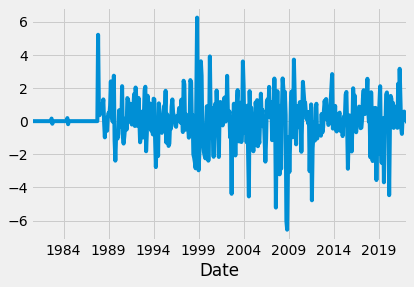

In [27]:
fer_diff = df['Open'].resample('MS').mean() - df['Open'].resample('MS').mean().shift(1)
fer_open_diff = fer_diff.dropna()
fer_open_diff.plot()

print(adf_test(fer_open_diff))

<AxesSubplot:xlabel='High', ylabel='Returns'>

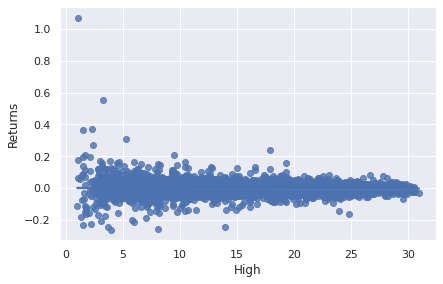

In [28]:
sns.set(color_codes = True)
sns.regplot(x = 'High', y = 'Returns', data = df)

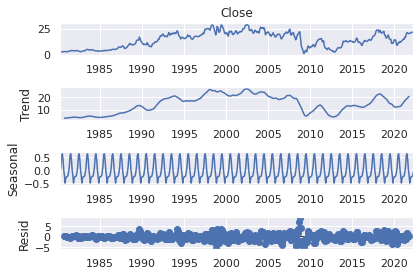

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(fer_month.Close, model='additive')
fig = decomposition.plot()
fig.figsize=(20,10)
plt.show()

<AxesSubplot:xlabel='Date'>

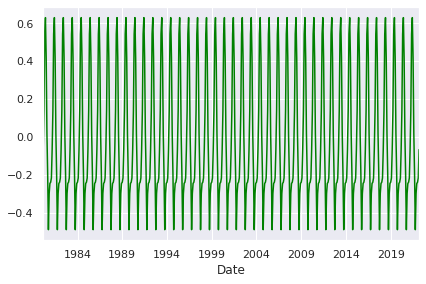

In [30]:
seasonality = decomposition.seasonal
seasonality.plot(color = 'green')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

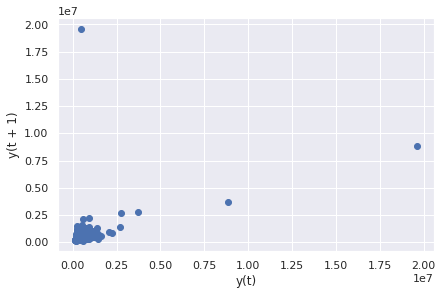

In [31]:
from pandas.plotting import lag_plot
lag_plot(df['Volume'].tail(250))

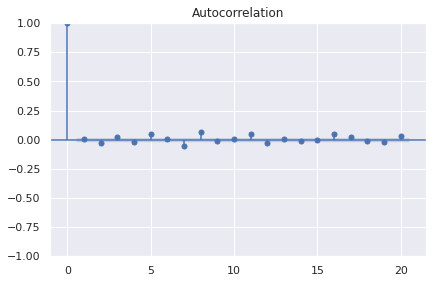

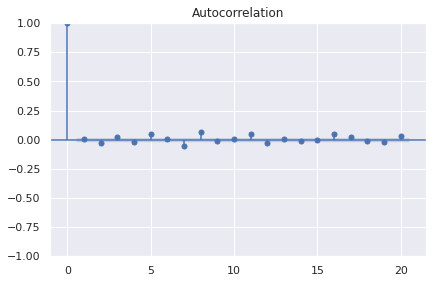

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Returns'], lags = 20)

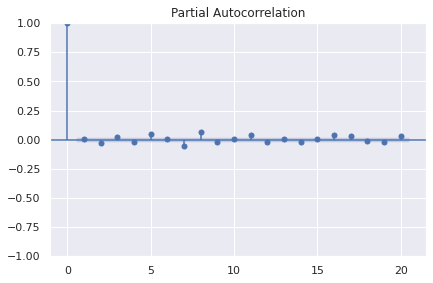

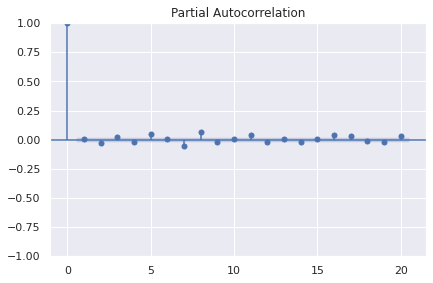

In [33]:
plot_pacf(df['Returns'],lags=20,method='ols')

In [34]:
from statsmodels.tsa.api import ARIMA
aic_vals = []
for i in range(3):
    model = ARIMA(df['Close'], order =(0,i,0))
    result = model.fit()
    aic_vals.append(result.aic)
    if i == 0:
        continue
        
    print('At order =', i-1, 'AIC value = ', aic_vals[i-1])

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt

At order = 0 AIC value =  71766.44555424416


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


At order = 1 AIC value =  7097.875062321082


In [35]:
model = ARIMA(df['Close'],order=(0,1,0))
result = model.fit()
print(result.aic)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


7097.875062321082


In [36]:
model2 = ARIMA(df['Close'],order=(0,1,1))
result2 = model2.fit()
print(result2.aic)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


7090.616598463192


In [37]:
model3= ARIMA(df['Close'],order=(0,1,2))
result3 = model3.fit()
print(result3.aic)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


7090.515418951167


In [38]:
model4 = ARIMA(df['Close'], order = (1,1,2))
result4 = model4.fit()
print(result4.aic)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


7090.925014130882


In [39]:
residuals = pd.DataFrame(result3.resid)
residuals = residuals.iloc[1:]
residuals.describe()

,0
count,10538.000000
mean,0.001800
std,0.338658
min,-3.990809
25%,-0.135649
50%,-0.000708
75%,0.138944
max,4.200007


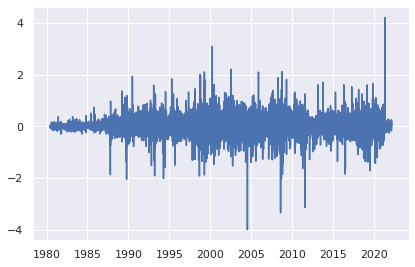

In [40]:
plt.plot(residuals)
plt.show()

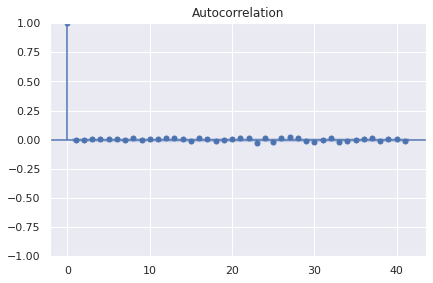

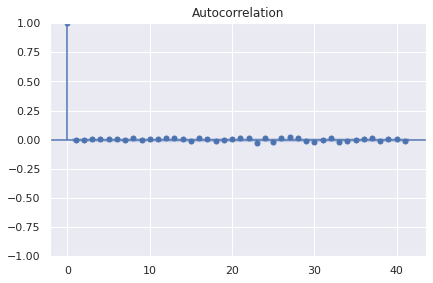

In [41]:
plot_acf(residuals)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


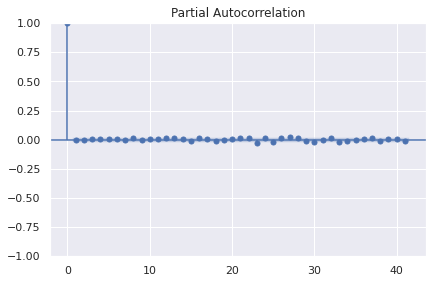

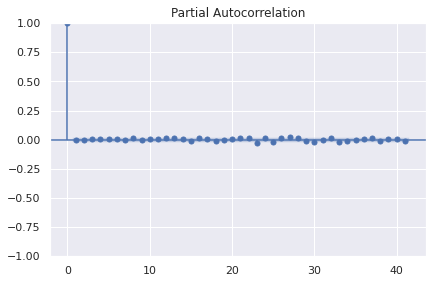

In [42]:
plot_pacf(residuals)

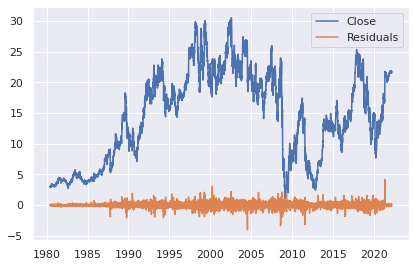

In [43]:
plt.plot(df[['Close']])
plt.plot(residuals)
plt.legend(['Close','Residuals'])

In [44]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
kpss_test(df['High'])

Results of KPSS Test:
Test Statistic            4.071391
p-value                   0.010000
Lags Used                60.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


<AxesSubplot:xlabel='Date'>

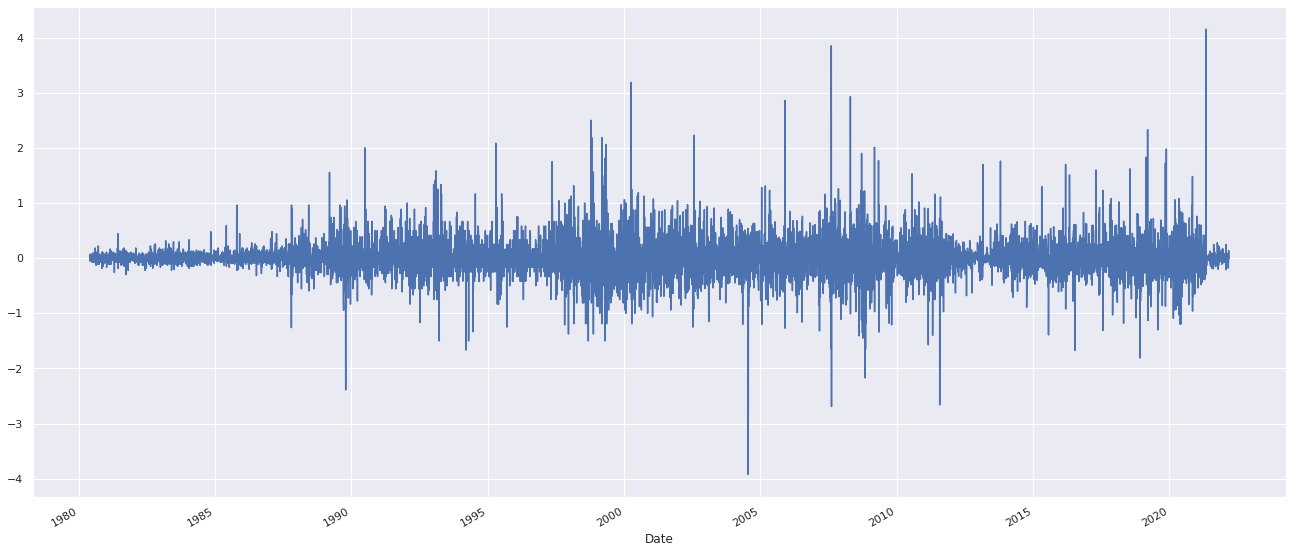

In [45]:
df['High_diff'] = df['High'] - df['High'].shift(1)
df['High_diff'].dropna().plot(figsize = (20,10))

In [46]:
kpss_test(df['High_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.049839
p-value                   0.100000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [47]:
kpss_test(df['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.052043
p-value                  0.100000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [48]:
kpss_test(df['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic            1.410514
p-value                   0.010000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [49]:
adf_test(df['High_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                   -98.089463
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    10537.000000
Critical Value (1%)               -3.430971
Critical Value (5%)               -2.861814
Critical Value (10%)              -2.566916
dtype: float64


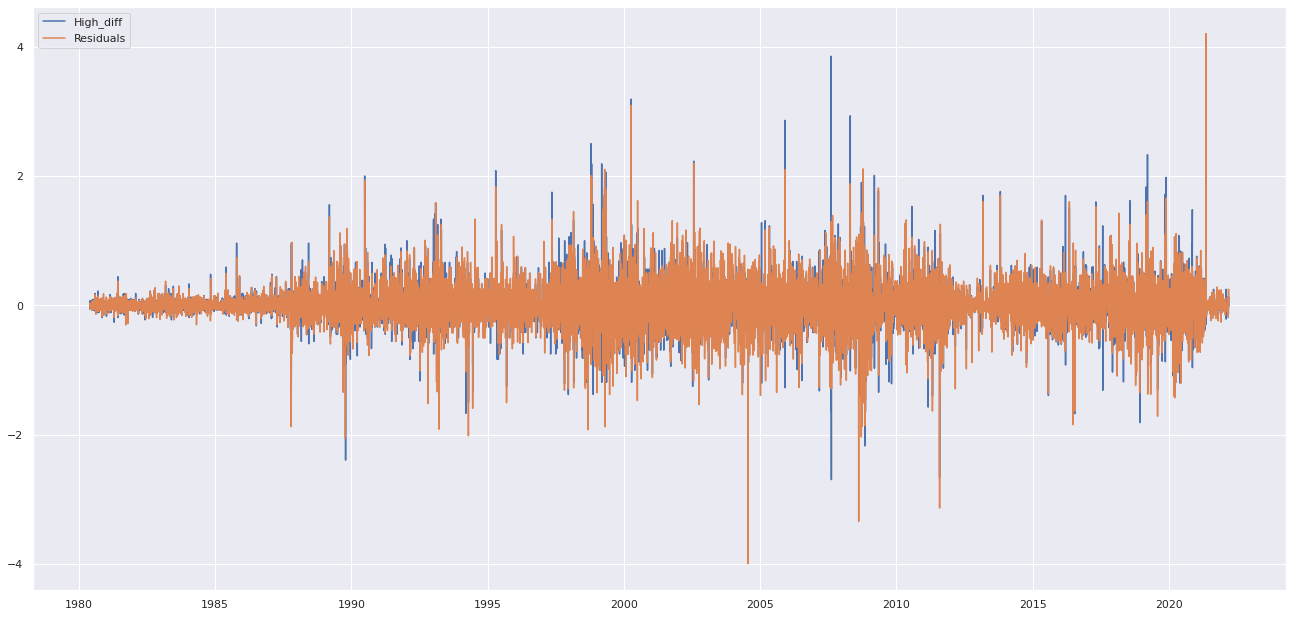

In [50]:
plt.figure(figsize = (20,10))
plt.plot(df['High_diff'])
plt.plot(residuals)
plt.legend(['High_diff','Residuals'])
plt.show()

In [51]:
train_df = df['High'].iloc[:-4]

X_train = []
y_train = []

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

8428

In [52]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

2022-04-17 17:50:20.865577: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2022-04-17 17:50:21.163092: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


106/106 - 2s - loss: 79.8605
Epoch 2/10
106/106 - 1s - loss: 0.3066
Epoch 3/10
106/106 - 1s - loss: 0.2041
Epoch 4/10
106/106 - 0s - loss: 0.1901
Epoch 5/10
106/106 - 0s - loss: 0.1802
Epoch 6/10
106/106 - 0s - loss: 0.1712
Epoch 7/10
106/106 - 0s - loss: 0.1666
Epoch 8/10
106/106 - 0s - loss: 0.1628
Epoch 9/10
106/106 - 0s - loss: 0.1600
Epoch 10/10
106/106 - 0s - loss: 0.1592


<AxesSubplot:>

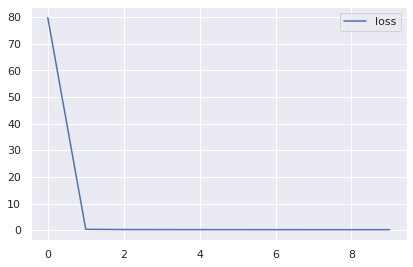

In [53]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [54]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)
from sklearn.metrics import mean_squared_error
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 0.3958104647141973
Validation rmse: 0.39737282553197123


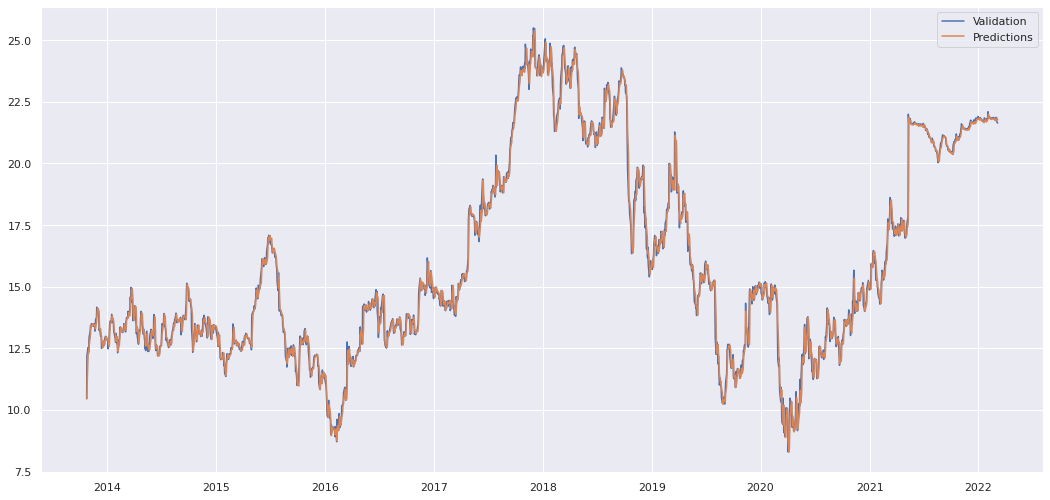

In [55]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [56]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,2107.000000
mean,0.019664
std,0.396980
min,-1.879726
25%,-0.167853
50%,0.010374
75%,0.197420
max,4.295294


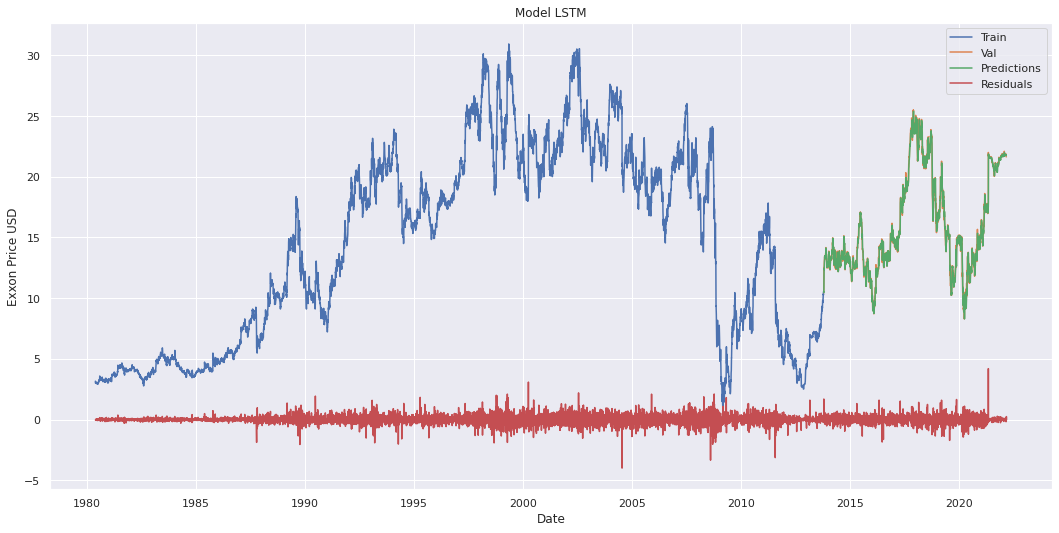

In [57]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Exxon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.plot(residuals)
plt.legend(['Train','Val','Predictions','Residuals'])
plt.show()